In [1]:
import calendar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# pandas settings to view all data when displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# set default pandas visualization to Seaborn
sns.set()

In [3]:
df = pd.read_excel('data/strava_fullXport.xlsx')

In [4]:
len(df.columns)

75

In [5]:
df.columns

Index(['Name', 'Distance', 'Moving Time', 'Elapsed Time',
       'Total Elevation Gain', 'Type', 'Workout Type', 'ID', 'External ID',
       'Upload ID', 'Start Date', 'Start Date Local', 'Timezone', 'UTC Offset',
       'Start (Latitude,Longitude)', 'End (Latitude,Longitude)',
       'Location City', 'Location State', 'Location Country', 'Start Latitude',
       'Start Longitude', 'Achievement Count', 'Kudos Count', 'Comment Count',
       'Athlete Count', 'Photo Count', 'Map', 'Trainer', 'Commute', 'Manual',
       'Private', 'Visibility', 'Flagged', 'Gear ID', 'Accepted Invitation',
       'upload_id_str', 'Average Speed', 'Maximum Speed', 'Device Watts',
       'Has Heartrate', 'Heartrate Opt-Out', 'Display Hide Heartrate Option',
       'Elevation High', 'Elevation Low', 'PR Count', 'Total Photo Count',
       'Has Kudoed', 'Average Watts', 'Kilojoules', 'Average Heartrate',
       'Maximum Heartrate', ' Gear Name', 'Pace', 'Distance (km)',
       'Apparent Temperature', 'Cloud Co

The dataset has way too many columns. Not all of them can be used, and for privacy I will not include the latitide and longitude.

So I will create a list of columns I want and add that to pandas.read_excel usecols parameter

In [6]:
columns_use = [
    'Name', 'Distance', 'Moving Time', 'Elapsed Time','Total Elevation Gain', 'Type',
    'Start Date Local', 'Achievement Count', 'Kudos Count', 'Commute', 'Manual','Average Speed', 'Maximum Speed', 
    'PR Count', 'Kilojoules', 'Average Heartrate','Maximum Heartrate', 'Distance (km)','Apparent Temperature', 
    'Cloud Cover', 'Dew Point', 'Humidity','Weather Icon Class', 'Precipation Probability', 'Precipation Type', 
    'Weather Summary','Weather Temperature', 'UV Index', 'Weather Visibility','weather_wind_direction', 'Wind Gust', 
    'Wind Speed']

In [7]:
df = pd.read_excel('data/strava_fullXport.xlsx', usecols=columns_use, parse_dates=[6])

In [8]:
df.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed
0,Morning Ride,13511.1,8124,8312,73.0,Ride,2016-11-08 08:46:46+00:00,0,2,True,False,1.663,10.7,0,NaN,NaN,NaN,13.5,18.65,NaN,11.14,0.62,clear-day,0.0,NaN,Clear,18.65,NaN,10.003,S,6.27,3.47
1,Morning commute,11648.9,1789,2232,57.5,Ride,2016-11-09 07:06:33+00:00,1,3,True,False,6.511,12.6,1,NaN,NaN,NaN,11.6,16.94,0.19,13.05,0.78,partly-cloudy-day,0.0,NaN,Partly Cloudy,16.94,1.0,10.003,S,5.07,2.55
2,Afternoon Ride,12241.7,2547,2775,51.7,Ride,2016-11-09 15:53:27+00:00,1,4,True,False,4.806,20.4,0,NaN,NaN,NaN,12.2,21.53,0.19,12.29,0.56,partly-cloudy-day,0.0,NaN,Partly Cloudy,21.53,4.0,10.003,SSE,6.97,5.23
3,Morning Ride,11825.2,1812,1828,57.5,Ride,2016-11-11 07:25:10+00:00,4,3,True,False,6.526,10.3,2,NaN,NaN,NaN,11.8,18.42,0.19,12.30,0.68,partly-cloudy-day,0.0,NaN,Partly Cloudy,18.42,1.0,10.003,SE,3.99,2.86
4,Afternoon Ride,12429.9,2552,2601,51.6,Ride,2016-11-11 15:36:40+00:00,3,2,True,False,4.871,14.7,0,NaN,NaN,NaN,12.4,25.68,NaN,13.88,0.48,clear-day,0.0,NaN,Clear,25.68,NaN,NaN,S,5.90,4.11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 32 columns):
Name                       597 non-null object
Distance                   597 non-null float64
Moving Time                597 non-null int64
Elapsed Time               597 non-null int64
Total Elevation Gain       597 non-null float64
Type                       597 non-null object
Start Date Local           597 non-null datetime64[ns, UTC]
Achievement Count          597 non-null int64
Kudos Count                597 non-null int64
Commute                    597 non-null bool
Manual                     597 non-null bool
Average Speed              597 non-null float64
Maximum Speed              597 non-null float64
PR Count                   597 non-null int64
Kilojoules                 499 non-null float64
Average Heartrate          464 non-null float64
Maximum Heartrate          464 non-null float64
Distance (km)              597 non-null float64
Apparent Temperature       597 non-nu

In [10]:
df.describe()

,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Achievement Count,Kudos Count,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Precipation Probability,Weather Temperature,UV Index,Weather Visibility,Wind Gust,Wind Speed
count,597.000000,597.000000,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000,499.000000,464.000000,464.000000,597.000000,597.00000,378.000000,596.000000,596.000000,534.000000,597.000000,388.000000,536.000000,532.000000,595.000000
mean,9271.534673,1998.587940,2288.872697,95.60067,0.673367,0.601340,5.366834,10.341709,0.288107,190.881964,136.498060,172.739224,9.269012,19.16129,0.474365,11.685772,0.641225,0.005637,19.150637,1.456186,9.948358,4.099624,3.126672
std,3640.080585,1188.248059,1578.987320,139.76401,1.954734,0.871933,5.245478,3.742642,1.161783,64.661497,20.155446,18.783606,3.637209,5.08577,0.297379,3.374883,0.152119,0.050360,4.999560,1.800269,1.252099,2.492645,2.230625
min,0.000000,7.000000,13.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,52.600000,60.000000,0.000000,2.10000,0.000000,1.400000,0.240000,0.000000,3.240000,0.000000,0.000000,0.020000,0.000000
25%,8580.600000,1566.000000,1647.000000,52.90000,0.000000,0.000000,4.903000,9.500000,0.000000,157.700000,124.650000,167.000000,8.600000,15.81000,0.190000,9.567500,0.530000,0.000000,15.810000,0.000000,10.003000,2.127500,1.600000
50%,10221.200000,1821.000000,1932.000000,70.30000,0.000000,0.000000,5.608000,10.600000,0.000000,206.600000,140.750000,177.000000,10.200000,19.20000,0.435000,11.880000,0.630000,0.000000,19.200000,1.000000,10.003000,3.925000,2.560000
75%,11773.600000,2123.000000,2375.000000,106.30000,0.000000,1.000000,6.183000,12.500000,0.000000,231.900000,150.500000,184.000000,11.800000,22.16000,0.750000,14.167500,0.750000,0.000000,22.090000,2.000000,10.003000,5.585000,4.070000
max,24000.000000,14085.000000,16556.000000,1565.60000,16.000000,5.000000,95.542000,24.100000,11.000000,880.100000,180.500000,225.000000,24.000000,33.04000,1.000000,18.960000,1.000000,0.840000,33.040000,10.000000,16.093000,13.490000,13.490000


In [11]:
df.isnull().sum()

Name                         0
Distance                     0
Moving Time                  0
Elapsed Time                 0
Total Elevation Gain         0
Type                         0
Start Date Local             0
Achievement Count            0
Kudos Count                  0
Commute                      0
Manual                       0
Average Speed                0
Maximum Speed                0
PR Count                     0
Kilojoules                  98
Average Heartrate          133
Maximum Heartrate          133
Distance (km)                0
Apparent Temperature         0
Cloud Cover                219
Dew Point                    1
Humidity                     1
Weather Icon Class           0
Precipation Probability     63
Precipation Type           518
Weather Summary              0
Weather Temperature          0
UV Index                   209
Weather Visibility          61
weather_wind_direction       3
Wind Gust                   65
Wind Speed                   2
dtype: i

In [12]:
df.isnull().mean()

Name                       0.000000
Distance                   0.000000
Moving Time                0.000000
Elapsed Time               0.000000
Total Elevation Gain       0.000000
Type                       0.000000
Start Date Local           0.000000
Achievement Count          0.000000
Kudos Count                0.000000
Commute                    0.000000
Manual                     0.000000
Average Speed              0.000000
Maximum Speed              0.000000
PR Count                   0.000000
Kilojoules                 0.164154
Average Heartrate          0.222781
Maximum Heartrate          0.222781
Distance (km)              0.000000
Apparent Temperature       0.000000
Cloud Cover                0.366834
Dew Point                  0.001675
Humidity                   0.001675
Weather Icon Class         0.000000
Precipation Probability    0.105528
Precipation Type           0.867672
Weather Summary            0.000000
Weather Temperature        0.000000
UV Index                   0

In [13]:
df.sample(10)

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed
237,Morning Ride,11775.1,2081,2134,110.0,Ride,2017-09-11 07:51:45+00:00,0,0,False,False,5.658,9.1,0,219.0,120.9,175.0,11.8,14.59,0.77,11.13,0.80,partly-cloudy-day,0.0,NaN,Mostly Cloudy,14.59,0.0,10.003,N,4.41,2.76
365,Afternoon Ride,11672.7,2385,2425,123.9,Ride,2018-01-18 15:44:10+00:00,0,2,False,False,4.894,11.9,0,250.5,143.5,167.0,11.7,30.67,NaN,18.88,0.53,clear-day,0.0,NaN,Clear,29.42,NaN,10.003,SSW,5.73,3.19
268,Morning Ride,5941.4,896,929,27.4,Ride,2017-10-02 10:15:05+00:00,0,1,False,False,6.631,10.2,0,101.7,143.2,169.0,5.9,26.91,NaN,11.53,0.38,clear-day,0.0,NaN,Clear,26.91,NaN,10.003,SE,0.24,0.03
134,Afternoon Ride,11928.6,2170,2320,71.6,Ride,2017-04-18 15:48:37+00:00,0,0,True,False,5.497,11.2,0,239.9,NaN,NaN,11.9,29.61,NaN,11.04,0.32,clear-day,0.0,NaN,Clear,29.61,NaN,10.003,S,2.10,1.10
464,Morning Ride,7020.3,1253,1253,41.0,Ride,2018-04-24 09:05:14+00:00,0,0,False,False,5.603,12.6,0,125.0,134.0,175.0,7.0,16.04,0.44,13.81,0.87,partly-cloudy-day,0.0,NaN,Partly Cloudy,16.04,1.0,10.003,NNW,3.78,1.98
38,Morning Ride,14458.9,2534,2559,69.0,Ride,2016-12-21 07:29:31+00:00,0,1,True,False,5.706,10.4,0,236.8,NaN,NaN,14.5,18.91,0.46,13.92,0.73,partly-cloudy-day,0.0,NaN,Partly Cloudy,18.91,1.0,10.003,NNW,1.48,1.48
76,Afternoon Ride,12418.4,2203,2813,66.6,Ride,2017-02-08 15:37:16+00:00,0,0,True,False,5.637,13.1,0,186.1,NaN,NaN,12.4,24.34,0.18,15.25,0.57,partly-cloudy-day,0.0,NaN,Partly Cloudy,24.34,6.0,10.003,S,5.32,3.45
467,Afternoon Ride,5204.1,874,2020,39.5,Ride,2018-04-25 17:00:08+00:00,0,1,False,False,5.954,13.9,0,104.0,101.2,135.0,5.2,17.43,NaN,10.53,0.64,clear-day,0.0,NaN,Clear,17.43,NaN,NaN,NW,8.81,6.47
82,Morning Ride,11703.3,1788,4561,62.3,Ride,2017-02-15 07:54:28+00:00,2,1,True,False,6.545,11.0,0,237.7,NaN,NaN,11.7,21.80,0.13,15.11,0.66,partly-cloudy-day,0.0,NaN,Partly Cloudy,21.80,1.0,10.003,SSW,1.77,1.69
328,Morning Run,10503.0,7870,10546,1249.8,Run,2017-12-15 05:17:22+00:00,14,4,False,False,1.335,5.9,10,NaN,133.1,181.0,10.5,13.92,NaN,9.78,0.76,clear-night,0.0,NaN,Clear,13.92,0.0,10.003,SSE,2.12,2.12


Looking at a few random observations I notice that NaN's are when the data is not available or there is none.<br>
for example `Precipation Type` is NaN if there is no precipitation. As the Province was experiencing the tail end of the worst drought in 100 years it makes sense that `Precipation Type` has 518 NaNs or 87% of the observations.

It might be easier to create additional Date and time columns from the datetime column `Start Date Local`

In [14]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df['Start Date Local']])
df = df.assign(date=new_dates, time=new_times)

Rounding the temperature to the nearest integer makes more sense

In [15]:
df['weather_temperature_round'] = round(df['Weather Temperature'])

In [16]:
df['weather_temperature_round'].value_counts()

19.0    56
20.0    55
18.0    49
21.0    48
22.0    46
17.0    40
15.0    39
16.0    29
14.0    25
23.0    24
24.0    24
26.0    23
25.0    21
12.0    20
11.0    15
28.0    14
27.0    14
13.0    12
10.0    11
7.0      7
30.0     4
29.0     4
9.0      4
33.0     3
32.0     3
31.0     2
8.0      2
6.0      2
3.0      1
Name: weather_temperature_round, dtype: int64

In [17]:
df[df['weather_temperature_round'] == 3.0]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
492,Morning Ride,8658.6,1571,1599,52.5,Ride,2018-07-16 08:21:28+00:00,0,1,False,False,5.512,12.5,0,149.3,147.1,186.0,8.7,2.1,NaN,1.4,0.88,clear-day,NaN,rain,Clear,3.24,NaN,10.003,NE,NaN,1.39,2018-07-16,08:21:28,3.0


Looking at the lowest temperature I commuted in.<br>
It happened in the middle of winter, with the Apparent Temperature at 2.1 Celsius __brrr!__
luckily there was not much wind

In [18]:
df.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
0,Morning Ride,13511.1,8124,8312,73.0,Ride,2016-11-08 08:46:46+00:00,0,2,True,False,1.663,10.7,0,NaN,NaN,NaN,13.5,18.65,NaN,11.14,0.62,clear-day,0.0,NaN,Clear,18.65,NaN,10.003,S,6.27,3.47,2016-11-08,08:46:46,19.0
1,Morning commute,11648.9,1789,2232,57.5,Ride,2016-11-09 07:06:33+00:00,1,3,True,False,6.511,12.6,1,NaN,NaN,NaN,11.6,16.94,0.19,13.05,0.78,partly-cloudy-day,0.0,NaN,Partly Cloudy,16.94,1.0,10.003,S,5.07,2.55,2016-11-09,07:06:33,17.0
2,Afternoon Ride,12241.7,2547,2775,51.7,Ride,2016-11-09 15:53:27+00:00,1,4,True,False,4.806,20.4,0,NaN,NaN,NaN,12.2,21.53,0.19,12.29,0.56,partly-cloudy-day,0.0,NaN,Partly Cloudy,21.53,4.0,10.003,SSE,6.97,5.23,2016-11-09,15:53:27,22.0
3,Morning Ride,11825.2,1812,1828,57.5,Ride,2016-11-11 07:25:10+00:00,4,3,True,False,6.526,10.3,2,NaN,NaN,NaN,11.8,18.42,0.19,12.30,0.68,partly-cloudy-day,0.0,NaN,Partly Cloudy,18.42,1.0,10.003,SE,3.99,2.86,2016-11-11,07:25:10,18.0
4,Afternoon Ride,12429.9,2552,2601,51.6,Ride,2016-11-11 15:36:40+00:00,3,2,True,False,4.871,14.7,0,NaN,NaN,NaN,12.4,25.68,NaN,13.88,0.48,clear-day,0.0,NaN,Clear,25.68,NaN,NaN,S,5.90,4.11,2016-11-11,15:36:40,26.0


In [19]:
df.tail()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
592,Evening Activity,0.0,3111,3111,0.0,Workout,2019-10-01 18:02:21+00:00,0,2,False,False,0.0,0.0,0,NaN,160.2,187.0,0.0,21.53,1.0,11.41,0.53,cloudy,0.0,NaN,Overcast,21.53,0.0,10.003,S,8.17,8.17,2019-10-01,18:02:21,22.0
593,Evening Activity,0.0,2757,2757,0.0,Workout,2019-10-01 19:04:55+00:00,0,2,False,False,0.0,0.0,0,NaN,154.9,186.0,0.0,21.53,1.0,11.41,0.53,cloudy,0.0,NaN,Overcast,21.53,0.0,10.003,S,8.17,8.17,2019-10-01,19:04:55,22.0
594,Afternoon Activity,0.0,1464,1464,0.0,Workout,2019-10-08 17:19:32+00:00,0,0,False,False,0.0,0.0,0,NaN,156.6,187.0,0.0,21.53,1.0,11.41,0.53,cloudy,0.0,NaN,Overcast,21.53,0.0,10.003,S,8.17,8.17,2019-10-08,17:19:32,22.0
595,Evening Activity,0.0,2451,2451,0.0,Workout,2019-10-08 18:04:33+00:00,0,0,False,False,0.0,0.0,0,NaN,146.3,192.0,0.0,21.53,1.0,11.41,0.53,cloudy,0.0,NaN,Overcast,21.53,0.0,10.003,S,8.17,8.17,2019-10-08,18:04:33,22.0
596,Evening Activity,0.0,2286,2286,0.0,Workout,2019-10-08 19:19:45+00:00,0,0,False,False,0.0,0.0,0,NaN,150.7,186.0,0.0,21.53,1.0,11.41,0.53,cloudy,0.0,NaN,Overcast,21.53,0.0,10.003,S,8.17,8.17,2019-10-08,19:19:45,22.0


In [20]:
df.Name.value_counts()

Morning Ride                   269
Afternoon Ride                 240
Morning Run                     21
Evening Activity                11
Evening Run                     11
Afternoon Activity               9
Lunch Ride                       6
Morning Activity                 5
Afternoon Run                    5
Evening Ride                     5
Cool Morning Ride                1
Morning Solo Run                 1
Batrun Recce                     1
Afternoon burrrn                 1
Night Activity - It              1
Morning chillin Ride             1
Morning commute                  1
afternoon Ride                   1
1st TT for 2019                  1
Celtics trail Run                1
Night Activity                   1
Morning Ride with roadsters      1
Critical mass                    1
FKT 3.0 take two                 1
Running from the devil           1
Name: Name, dtype: int64

In [21]:
df.Type.value_counts()

Ride       527
Run         43
Workout     27
Name: Type, dtype: int64

The dataset is my complete Strava data, including runs and swimming.<br>
The dataset contains data from 8 November 2016 to 8 October 2019.<br>
For my commute analysis I will create a subset that contains only 'Ride' Type observations


## Create subset that only includes rides

In [56]:
rides = df[df.Type == 'Ride']

I exclude December 2016 and January 2019 so as to get two full years of data

In [57]:
# filtering to include 2 "full" years
rides = rides[(rides['Start Date Local'] > '2017-01-01 00:00') & (rides['Start Date Local'] < '2019-01-01 00:00')].reset_index(drop=True)

In [58]:
rides.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
0,Morning Ride,14068.4,2641,2781,73.4,Ride,2017-01-05 07:40:50+00:00,0,0,True,False,5.327,10.8,0,250.2,NaN,NaN,14.1,20.46,0.37,16.50,0.79,partly-cloudy-day,0.0,NaN,Partly Cloudy,20.32,1.0,10.003,S,3.84,2.71,2017-01-05,07:40:50,20.0
1,Morning Ride,11656.7,1649,1687,62.0,Ride,2017-01-09 07:05:37+00:00,2,0,True,False,7.069,11.6,2,242.2,NaN,NaN,11.7,19.99,0.19,15.64,0.76,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.95,0.0,10.003,S,8.51,4.29,2017-01-09,07:05:37,20.0
2,Afternoon Ride,12747.4,3144,3981,78.5,Ride,2017-01-09 15:55:28+00:00,0,1,True,False,4.055,13.5,0,219.4,NaN,NaN,12.7,24.60,0.19,15.95,0.59,partly-cloudy-day,0.0,NaN,Partly Cloudy,24.55,6.0,10.003,SSE,12.21,7.74,2017-01-09,15:55:28,25.0
3,Morning Ride,11638.4,1739,1805,60.5,Ride,2017-01-10 07:08:35+00:00,0,0,True,False,6.693,10.7,0,229.3,NaN,NaN,11.6,19.58,0.00,13.15,0.66,clear-day,0.0,NaN,Clear,19.58,1.0,3.909,SSE,4.77,1.55,2017-01-10,07:08:35,20.0
4,Afternoon Ride,11917.7,2423,2682,73.2,Ride,2017-01-10 15:50:34+00:00,0,0,True,False,4.919,9.6,0,229.0,NaN,NaN,11.9,31.04,NaN,16.30,0.41,clear-day,0.0,NaN,Clear,30.94,NaN,10.003,S,7.24,3.55,2017-01-10,15:50:34,31.0


In [59]:
rides.tail()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
479,Afternoon Ride,3666.9,628,658,24.8,Ride,2018-11-16 16:18:19+00:00,0,1,False,False,5.839,14.2,0,69.1,155.6,184.0,3.7,21.24,0.75,10.69,0.51,partly-cloudy-day,0.0,NaN,Mostly Cloudy,21.24,3.0,10.003,SW,8.20,8.20,2018-11-16,16:18:19,21.0
480,Morning Ride,8734.0,1534,1563,55.8,Ride,2018-11-19 08:25:47+00:00,0,0,False,False,5.694,12.4,0,141.7,144.3,188.0,8.7,20.48,0.79,12.76,0.61,partly-cloudy-day,0.0,NaN,Mostly Cloudy,20.48,3.0,15.575,WNW,2.70,2.41,2018-11-19,08:25:47,20.0
481,Afternoon Ride,8632.7,1416,1489,70.9,Ride,2018-11-19 16:54:27+00:00,0,0,False,False,6.097,13.4,0,165.8,140.3,180.0,8.6,21.18,0.00,14.23,0.65,clear-day,0.0,NaN,Clear,21.18,3.0,10.003,SSE,4.39,4.39,2018-11-19,16:54:27,21.0
482,Morning Ride,8690.4,1464,1522,55.6,Ride,2018-11-21 08:43:44+00:00,0,0,False,False,5.936,14.5,0,155.8,133.6,173.0,8.7,17.99,0.79,7.52,0.50,partly-cloudy-day,0.0,NaN,Mostly Cloudy,17.99,3.0,9.625,SSE,8.89,7.62,2018-11-21,08:43:44,18.0
483,Afternoon Ride,8653.5,1702,1883,71.7,Ride,2018-11-21 16:44:25+00:00,0,0,False,False,5.084,10.2,0,162.0,127.1,180.0,8.7,18.16,0.19,9.47,0.57,partly-cloudy-day,0.0,NaN,Windy and Partly Cloudy,18.16,3.0,10.003,S,13.49,13.49,2018-11-21,16:44:25,18.0


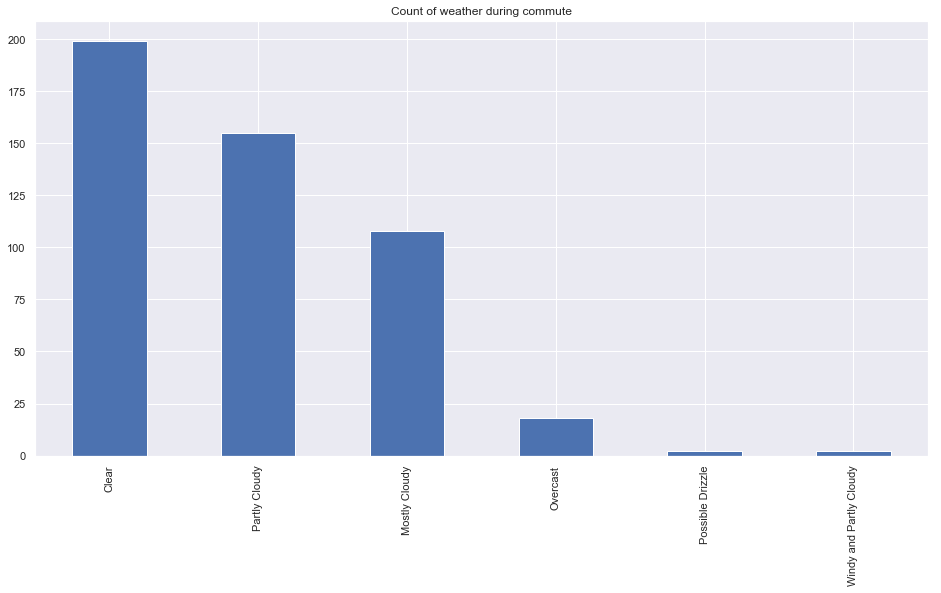

In [60]:
rides['Weather Summary'].value_counts().plot(kind='bar', title="Count of weather during commute", figsize=(16,8))
plt.show()

In [61]:
rides.Name.unique()

array(['Morning Ride', 'Afternoon Ride', 'Evening Ride',
       'Afternoon burrrn', 'Morning chillin Ride', 'Cool Morning Ride',
       'Lunch Ride', 'afternoon Ride'], dtype=object)

In [62]:
rides = rides.replace(
    {'Name' : 
     {'Morning chillin Ride': 'Morning Ride', 'Cool Morning Ride': 'Morning Ride', 
      'Lunch Ride': 'Afternoon Ride', 'afternoon Ride': 'Afternoon Ride', 'Evening Ride': 'Afternoon Ride', 
      'Afternoon burrrn': 'Afternoon Ride'}})

In [63]:
rides.Name.unique()

array(['Morning Ride', 'Afternoon Ride'], dtype=object)

#### Check for outliers

In [64]:
rides.dtypes

Name                                      object
Distance                                 float64
Moving Time                                int64
Elapsed Time                               int64
Total Elevation Gain                     float64
Type                                      object
Start Date Local             datetime64[ns, UTC]
Achievement Count                          int64
Kudos Count                                int64
Commute                                     bool
Manual                                      bool
Average Speed                            float64
Maximum Speed                            float64
PR Count                                   int64
Kilojoules                               float64
Average Heartrate                        float64
Maximum Heartrate                        float64
Distance (km)                            float64
Apparent Temperature                     float64
Cloud Cover                              float64
Dew Point           

Name is not numeric
Distance


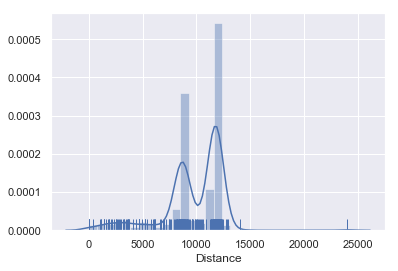

Moving Time


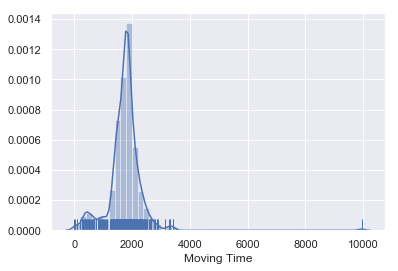

Elapsed Time


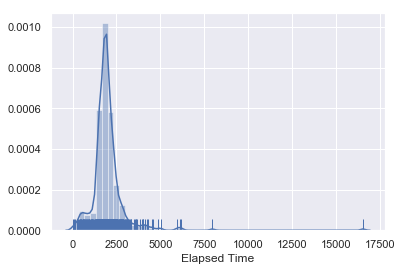

Total Elevation Gain


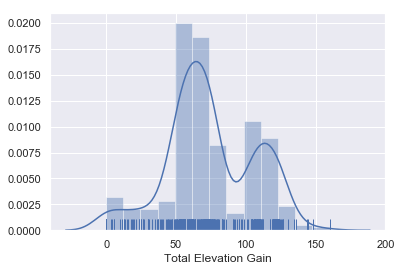

Type is not numeric
Start Date Local is not numeric
Achievement Count


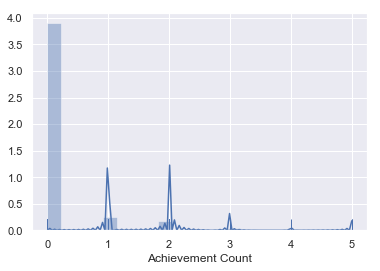

Kudos Count


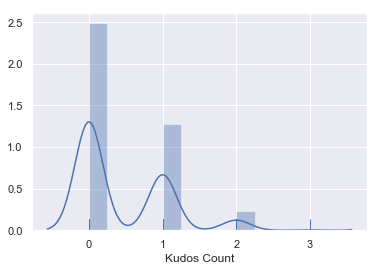

Commute is not numeric
Manual is not numeric
Average Speed


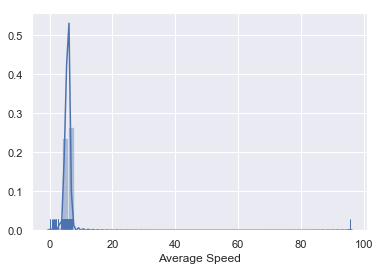

Maximum Speed


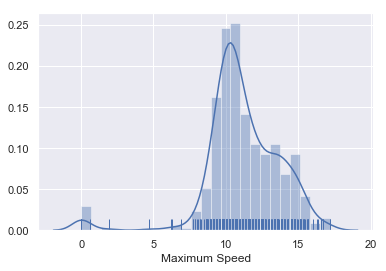

PR Count


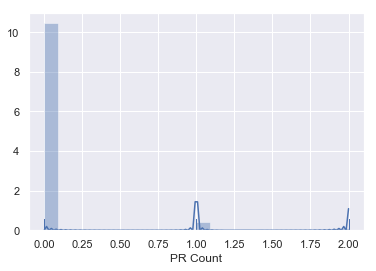

Kilojoules
Could not plot Kilojoules
Average Heartrate
Could not plot Average Heartrate
Maximum Heartrate
Could not plot Maximum Heartrate
Distance (km)


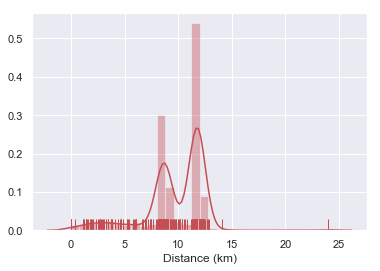

Apparent Temperature


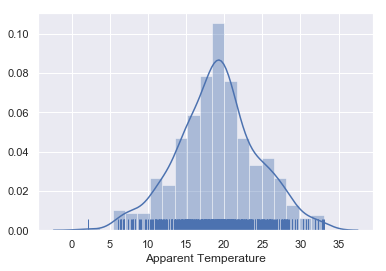

Cloud Cover
Could not plot Cloud Cover
Dew Point


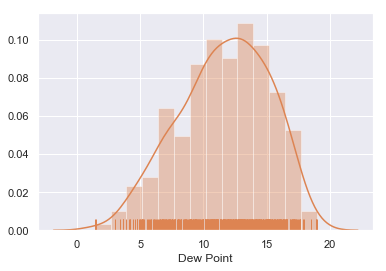

Humidity


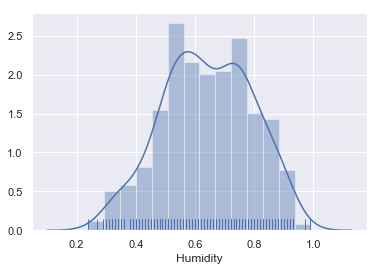

Weather Icon Class is not numeric
Precipation Probability


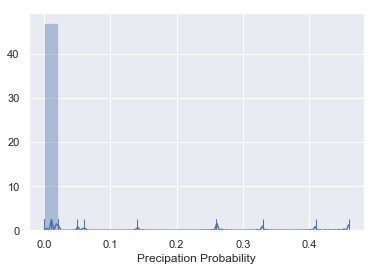

Precipation Type is not numeric
Weather Summary is not numeric
Weather Temperature


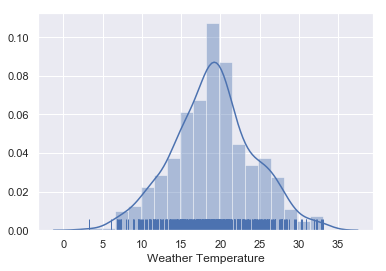

UV Index
Could not plot UV Index
Weather Visibility


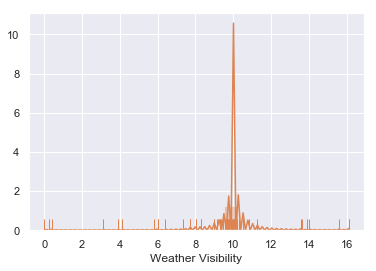

weather_wind_direction is not numeric
Wind Gust
Could not plot Wind Gust
Wind Speed
Could not plot Wind Speed
date is not numeric
time is not numeric
weather_temperature_round


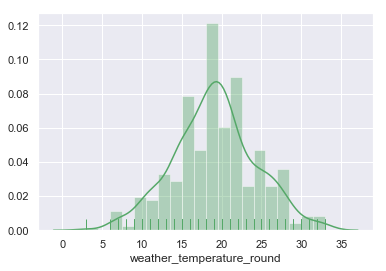

In [65]:
for col  in rides.columns:
    if (df[col].dtype == 'float64') or (df[col].dtype =='int64'):
        print(col)
        try:
            sns.distplot(rides[col], rug=True)
            plt.show()
        except ValueError:
            print(f'Could not plot {col}')
    else:
        print(f'{col} is not numeric')

##### Looking at outliers

'Moving Time' -  I must have forgotten to stop the ride. 165 minutes for a 12km ride is very suspect.<br>
'Elapsed Time' - Elapsed Time is the difference between start and end time. Therefore it will be the same observation as 'Moving Time'<br>
'Average Speed' - 95 when all other rides are below 20. I must have started my commute and gotten a lift. That speeed requires much more horsepower than manpower! 

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
69,Afternoon Ride,12019.5,9941,16556,74.7,Ride,2017-03-13 15:48:18+00:00,0,1,False,False,1.209,10.4,0,880.1,NaN,NaN,12.0,25.62,NaN,13.57,0.47,clear-day,0.0,NaN,Clear,25.62,NaN,NaN,SSW,6.21,3.56,2017-03-13,15:48:18,26.0


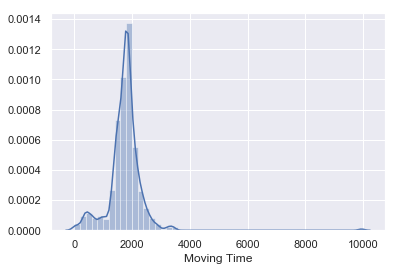

In [66]:
sns.distplot(rides['Moving Time'])
rides[rides['Moving Time']== rides['Moving Time'].max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
69,Afternoon Ride,12019.5,9941,16556,74.7,Ride,2017-03-13 15:48:18+00:00,0,1,False,False,1.209,10.4,0,880.1,NaN,NaN,12.0,25.62,NaN,13.57,0.47,clear-day,0.0,NaN,Clear,25.62,NaN,NaN,SSW,6.21,3.56,2017-03-13,15:48:18,26.0


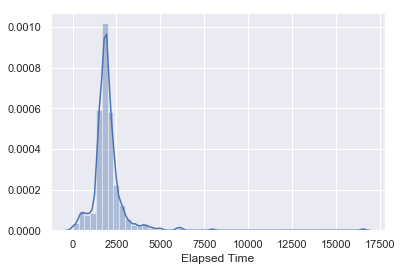

In [67]:
sns.distplot(rides['Elapsed Time'])
rides[rides['Elapsed Time']== rides['Elapsed Time'].max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
11,Afternoon Ride,9172.0,96,2874,18.9,Ride,2017-01-16 15:20:11+00:00,0,0,True,False,95.542,6.9,0,1.8,NaN,NaN,9.2,25.94,NaN,12.82,0.44,clear-day,0.0,NaN,Clear,25.94,NaN,10.003,SSE,6.47,3.1,2017-01-16,15:20:11,26.0


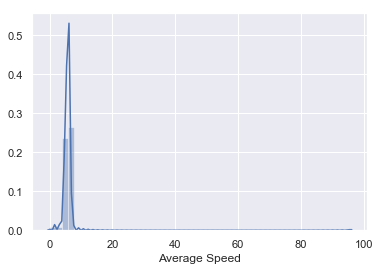

In [68]:
sns.distplot(rides['Average Speed'])
rides[rides['Average Speed']== rides['Average Speed'].max()]

In [71]:
rides[rides['Average Speed']> 20.0]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
11,Afternoon Ride,9172.0,96,2874,18.9,Ride,2017-01-16 15:20:11+00:00,0,0,True,False,95.542,6.9,0,1.8,NaN,NaN,9.2,25.94,NaN,12.82,0.44,clear-day,0.0,NaN,Clear,25.94,NaN,10.003,SSE,6.47,3.1,2017-01-16,15:20:11,26.0


,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
5,Morning Ride,11900.0,1800,1800,0.0,Ride,2017-01-11 07:32:32+00:00,0,1,True,True,6.611,0.0,0,NaN,NaN,NaN,11.9,31.04,NaN,16.30,0.41,clear-day,0.0,NaN,Clear,30.94,NaN,10.003,S,7.24,3.55,2017-01-11,07:32:32,31.0,January,11,1,30,Wednesday
48,Afternoon Ride,0.0,2518,2518,0.0,Ride,2017-02-21 15:40:37+00:00,0,0,True,True,0.000,0.0,0,NaN,NaN,NaN,0.0,19.61,0.13,13.05,0.66,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.61,0.0,10.003,SSE,4.38,2.32,2017-02-21,15:40:37,20.0,February,21,2,42,Tuesday
72,Afternoon Ride,12100.0,1860,1860,0.0,Ride,2017-03-17 07:45:22+00:00,0,1,True,True,6.505,0.0,0,NaN,NaN,NaN,12.1,22.89,NaN,13.45,0.55,clear-day,0.0,NaN,Clear,22.89,NaN,10.003,WNW,2.40,1.73,2017-03-17,07:45:22,23.0,March,17,3,31,Friday
114,Afternoon Ride,0.0,2355,2355,0.0,Ride,2017-05-20 13:19:22+00:00,0,0,False,False,0.000,0.0,0,NaN,160.5,188.0,0.0,20.87,NaN,13.75,0.64,clear-day,0.0,NaN,Clear,20.87,NaN,10.003,SSE,2.05,0.43,2017-05-20,13:19:22,21.0,May,20,5,39,Saturday
156,Afternoon Ride,11680.0,1860,1860,0.0,Ride,2017-08-15 20:00:00+00:00,0,0,True,True,6.280,0.0,0,NaN,NaN,NaN,11.7,6.84,0.25,3.64,0.80,partly-cloudy-day,0.0,NaN,Partly Cloudy,6.84,0.0,10.003,E,1.04,1.04,2017-08-15,20:00:00,7.0,August,15,8,31,Tuesday
211,Morning Ride,4.4,7,67,0.0,Ride,2017-10-13 07:50:03+00:00,0,0,False,False,0.629,0.6,0,0.1,90.6,109.0,0.0,16.59,NaN,7.77,0.56,clear-day,0.0,NaN,Clear,16.59,NaN,10.003,SE,4.32,1.63,2017-10-13,07:50:03,17.0,October,13,10,0,Friday
217,Morning Ride,17.0,13,13,0.0,Ride,2017-10-23 07:51:36+00:00,0,0,False,False,1.308,1.9,0,0.3,67.5,72.0,0.0,15.31,0.54,12.71,0.84,partly-cloudy-day,0.0,NaN,Mostly Cloudy,15.31,1.0,7.725,N,0.48,0.48,2017-10-23,07:51:36,15.0,October,23,10,0,Monday
251,Morning Ride,24000.0,3300,3300,0.0,Ride,2017-12-07 07:30:00+00:00,0,0,True,True,7.273,0.0,0,NaN,NaN,NaN,24.0,23.51,0.52,13.19,0.52,partly-cloudy-day,0.0,NaN,Mostly Cloudy,23.51,2.0,10.003,ESE,4.46,3.77,2017-12-07,07:30:00,24.0,December,7,12,55,Thursday
257,Morning Ride,11850.0,2100,2100,0.0,Ride,2017-12-14 08:00:00+00:00,0,0,True,True,5.643,0.0,0,NaN,NaN,NaN,11.9,20.53,0.75,13.22,0.63,partly-cloudy-day,0.0,NaN,Mostly Cloudy,20.53,4.0,10.003,WSW,2.05,2.05,2017-12-14,08:00:00,21.0,December,14,12,35,Thursday
269,Afternoon Ride,12000.0,2880,2880,0.0,Ride,2018-01-03 15:30:00+00:00,0,2,True,True,4.167,0.0,0,NaN,NaN,NaN,12.0,21.68,NaN,13.36,0.59,clear-day,0.0,NaN,Clear,21.68,NaN,10.003,SSE,3.45,3.45,2018-01-03,15:30:00,22.0,January,3,1,48,Wednesday


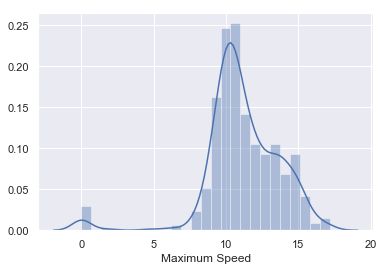

In [184]:
sns.distplot(rides['Maximum Speed'])
rides[rides['Maximum Speed'] < 5]

__Decision__:<br>
index 11 is obviously an incorrect entry and will be deleted.<br>
index 48 and 114 are errors, 39+ minutes with zero distance? both will be deleted<br>
index 69 is an error but is a valid, I will replace the erroneous variables with the average for that distance for that time of year<br>
-note `Average Speed` is a calculation based on the time and distance and will need to be recalculated

In [72]:
rides[(rides.Distance >12019.5) & (rides.Distance <13019.5)][['Moving Time', 'Elapsed Time', 'Average Speed']].mean()

Moving Time      2468.857143
Elapsed Time     3238.928571
Average Speed       5.089500
dtype: float64

In [82]:
rides.iat[69, 2]= 2469

In [84]:
rides.iat[69, 3]= 3239

In [87]:
rides.iat[69, 11] = 5.09

In [88]:
rides.iloc[[69]]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
69,Afternoon Ride,12019.5,2469,3239,74.7,Ride,2017-03-13 15:48:18+00:00,0,1,False,False,5.09,10.4,0,880.1,NaN,NaN,12.0,25.62,NaN,13.57,0.47,clear-day,0.0,NaN,Clear,25.62,NaN,NaN,SSW,6.21,3.56,2017-03-13,15:48:18,26.0


In [90]:
rides = rides.drop(rides.index[11,48, 114])

___

##### Rides per day
Logically, there should be 2 or less rides per day. However, there was a data center I sometimes had to stop at to perform some tasks in 2017.
Sometimes I would stop to visit my Granny, or very rarely - I would get court in a downpour.

In [91]:
ride_counts_daily = rides.groupby('date')['Distance'].count()

In [92]:
ride_counts_daily_dates = ride_counts_daily[ride_counts_daily > 2].index.to_list()

In [93]:
len(ride_counts_daily_dates)

11

In [94]:
rides[rides.date.isin(ride_counts_daily_dates)]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
111,Morning Ride,6111.8,1050,1219,26.4,Ride,2017-05-19 07:31:20+00:00,0,0,False,False,5.821,8.8,0,104.3,127.0,160.0,6.1,12.28,NaN,10.27,0.88,clear-night,0.00,NaN,Clear,12.28,0.0,NaN,NaN,0.02,0.02,2017-05-19,07:31:20,12.0
112,Morning Ride,6020.6,1048,1177,37.0,Ride,2017-05-19 09:55:53+00:00,0,0,False,False,5.745,10.4,0,130.3,133.6,170.0,6.0,15.49,NaN,13.23,0.86,clear-day,0.00,NaN,Clear,15.49,NaN,10.003,SSE,0.29,0.29,2017-05-19,09:55:53,15.0
113,Afternoon Ride,11849.5,2166,2283,73.3,Ride,2017-05-19 15:37:47+00:00,0,0,False,False,5.471,9.1,0,225.1,149.7,188.0,11.8,20.87,NaN,13.75,0.64,clear-day,0.00,NaN,Clear,20.87,NaN,10.003,SSE,2.05,0.43,2017-05-19,15:37:47,21.0
181,Morning Ride,11741.9,1784,1799,110.2,Ride,2017-09-15 07:39:31+00:00,0,0,False,False,6.582,11.3,0,231.6,136.5,172.0,11.7,15.15,0.45,10.11,0.72,partly-cloudy-day,0.00,NaN,Partly Cloudy,15.15,0.0,10.003,SE,5.88,3.52,2017-09-15,07:39:31,15.0
182,Afternoon Ride,2124.0,421,472,49.4,Ride,2017-09-15 14:56:27+00:00,0,0,False,False,5.045,12.6,0,70.8,95.0,127.0,2.1,16.14,0.45,11.91,0.76,partly-cloudy-day,0.00,NaN,Partly Cloudy,16.14,4.0,10.003,SSE,3.49,1.52,2017-09-15,14:56:27,16.0
183,Afternoon Ride,4897.1,1045,1045,46.9,Ride,2017-09-15 15:24:56+00:00,0,0,False,False,4.686,9.6,0,90.3,147.7,161.0,4.9,16.47,0.32,11.62,0.73,partly-cloudy-day,0.00,NaN,Partly Cloudy,16.47,3.0,10.003,SE,5.90,2.16,2017-09-15,15:24:56,16.0
227,Morning Ride,11717.1,1786,1892,73.0,Ride,2017-11-08 07:55:18+00:00,0,0,False,False,6.561,10.6,0,230.4,100.5,130.0,11.7,18.34,0.13,7.48,0.49,partly-cloudy-day,0.00,NaN,Partly Cloudy,18.34,2.0,10.065,SE,3.08,1.89,2017-11-08,07:55:18,18.0
228,Afternoon Ride,8573.2,1631,1733,160.0,Ride,2017-11-08 16:05:55+00:00,0,0,False,False,5.256,10.1,0,243.3,148.7,177.0,8.6,27.60,NaN,9.45,0.32,clear-day,0.00,NaN,Clear,27.60,NaN,10.003,SSE,3.90,2.48,2017-11-08,16:05:55,28.0
229,Afternoon Ride,3768.6,671,671,54.0,Ride,2017-11-08 17:13:18+00:00,0,0,False,False,5.616,9.5,0,97.9,144.4,175.0,3.8,25.66,0.75,9.02,0.35,partly-cloudy-day,0.00,NaN,Mostly Cloudy,25.66,1.0,10.003,SE,5.49,3.83,2017-11-08,17:13:18,26.0
257,Morning Ride,11850.0,2100,2100,0.0,Ride,2017-12-14 08:00:00+00:00,0,0,True,True,5.643,0.0,0,NaN,NaN,NaN,11.9,20.53,0.75,13.22,0.63,partly-cloudy-day,0.00,NaN,Mostly Cloudy,20.53,4.0,10.003,WSW,2.05,2.05,2017-12-14,08:00:00,21.0


In [95]:
rides[rides['Total Elevation Gain'] == 0.0]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round
5,Morning Ride,11900.0,1800,1800,0.0,Ride,2017-01-11 07:32:32+00:00,0,1,True,True,6.611,0.0,0,NaN,NaN,NaN,11.9,31.04,NaN,16.30,0.41,clear-day,0.0,NaN,Clear,30.94,NaN,10.003,S,7.24,3.55,2017-01-11,07:32:32,31.0
48,Afternoon Ride,0.0,2518,2518,0.0,Ride,2017-02-21 15:40:37+00:00,0,0,True,True,0.000,0.0,0,NaN,NaN,NaN,0.0,19.61,0.13,13.05,0.66,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.61,0.0,10.003,SSE,4.38,2.32,2017-02-21,15:40:37,20.0
72,Afternoon Ride,12100.0,1860,1860,0.0,Ride,2017-03-17 07:45:22+00:00,0,1,True,True,6.505,0.0,0,NaN,NaN,NaN,12.1,22.89,NaN,13.45,0.55,clear-day,0.0,NaN,Clear,22.89,NaN,10.003,WNW,2.40,1.73,2017-03-17,07:45:22,23.0
84,Afternoon Ride,1793.3,336,453,0.0,Ride,2017-04-14 12:37:13+00:00,0,0,False,False,5.337,8.9,0,24.2,145.1,170.0,1.8,18.46,0.55,8.50,0.52,partly-cloudy-day,0.0,NaN,Mostly Cloudy,18.46,4.0,10.003,ESE,2.80,1.98,2017-04-14,12:37:13,18.0
93,Afternoon Ride,1907.2,380,453,0.0,Ride,2017-04-28 12:13:02+00:00,0,0,False,False,5.019,7.9,0,26.6,129.1,156.0,1.9,25.89,NaN,15.26,0.52,clear-day,0.0,NaN,Clear,25.89,NaN,10.003,S,1.10,0.35,2017-04-28,12:13:02,26.0
114,Afternoon Ride,0.0,2355,2355,0.0,Ride,2017-05-20 13:19:22+00:00,0,0,False,False,0.000,0.0,0,NaN,160.5,188.0,0.0,20.87,NaN,13.75,0.64,clear-day,0.0,NaN,Clear,20.87,NaN,10.003,SSE,2.05,0.43,2017-05-20,13:19:22,21.0
156,Afternoon Ride,11680.0,1860,1860,0.0,Ride,2017-08-15 20:00:00+00:00,0,0,True,True,6.280,0.0,0,NaN,NaN,NaN,11.7,6.84,0.25,3.64,0.80,partly-cloudy-day,0.0,NaN,Partly Cloudy,6.84,0.0,10.003,E,1.04,1.04,2017-08-15,20:00:00,7.0
211,Morning Ride,4.4,7,67,0.0,Ride,2017-10-13 07:50:03+00:00,0,0,False,False,0.629,0.6,0,0.1,90.6,109.0,0.0,16.59,NaN,7.77,0.56,clear-day,0.0,NaN,Clear,16.59,NaN,10.003,SE,4.32,1.63,2017-10-13,07:50:03,17.0
217,Morning Ride,17.0,13,13,0.0,Ride,2017-10-23 07:51:36+00:00,0,0,False,False,1.308,1.9,0,0.3,67.5,72.0,0.0,15.31,0.54,12.71,0.84,partly-cloudy-day,0.0,NaN,Mostly Cloudy,15.31,1.0,7.725,N,0.48,0.48,2017-10-23,07:51:36,15.0
251,Morning Ride,24000.0,3300,3300,0.0,Ride,2017-12-07 07:30:00+00:00,0,0,True,True,7.273,0.0,0,NaN,NaN,NaN,24.0,23.51,0.52,13.19,0.52,partly-cloudy-day,0.0,NaN,Mostly Cloudy,23.51,2.0,10.003,ESE,4.46,3.77,2017-12-07,07:30:00,24.0


Some entries were manually inputted, these were often entered the day after or on the day (but after the commute) when the ride couldn't be recorded via my watch or phone.<br>
Unfortunately the date it was manually inputted was not recorded, rather the actual date the data was being inputted. I will keep these records as they are commutes and only 11 records have the incorrect date.

Lets create some variables that will healp in the analysis

In [99]:
rides['month'] = [d.strftime('%B') for d in rides['date']]

In [100]:
rides['day_num'] = [d.day for d in rides['date']]

In [101]:
rides['month_num'] = [d.month for d in rides['date']]

In [102]:
rides['riding_time_minutes'] = rides['Moving Time'].apply(lambda x: round(x/60))

In [104]:
# Day of Week
rides['DoW'] = rides['date'].apply(lambda x: calendar.day_name[x.weekday()])

Weekend rides

In [204]:
rides[rides.DoW.isin(['Saturday', 'Sunday'])]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
114,Afternoon Ride,0.0,2355,2355,0.0,Ride,2017-05-20 13:19:22+00:00,0,0,False,False,0.000,0.0,0,NaN,160.5,188.0,0.0,20.87,NaN,13.75,0.64,clear-day,0.0,NaN,Clear,20.87,NaN,10.003,SSE,2.05,0.43,2017-05-20,13:19:22,21.0,May,20,5,39,Saturday
184,Morning Ride,2906.2,483,591,21.3,Ride,2017-09-16 07:38:20+00:00,0,0,False,False,6.017,8.8,0,52.2,137.5,174.0,2.9,15.04,0.19,9.53,0.70,partly-cloudy-day,0.0,NaN,Partly Cloudy,15.04,0.0,10.003,SSE,5.91,3.59,2017-09-16,07:38:20,15.0,September,16,9,8,Saturday
185,Morning Ride,2328.4,436,436,20.2,Ride,2017-09-16 08:31:20+00:00,0,0,False,False,5.340,9.0,0,40.7,140.7,165.0,2.3,16.31,0.19,9.96,0.66,partly-cloudy-day,0.0,NaN,Partly Cloudy,16.31,1.0,10.003,SSE,6.18,4.32,2017-09-16,08:31:20,16.0,September,16,9,7,Saturday
400,Afternoon Ride,6670.0,1500,1500,0.0,Ride,2018-07-14 08:10:00+00:00,0,1,False,True,4.447,0.0,0,NaN,NaN,NaN,6.7,22.25,NaN,5.17,0.33,clear-day,NaN,rain,Clear,22.25,NaN,10.003,NNW,NaN,8.41,2018-07-14,08:10:00,22.0,July,14,7,25,Saturday
401,Morning Ride,2650.4,549,565,23.3,Ride,2018-07-14 09:50:16+00:00,0,0,False,False,4.828,10.4,0,47.5,103.1,139.0,2.7,10.90,0.49,9.01,0.88,partly-cloudy-day,NaN,rain,Partly Cloudy,10.90,1.0,9.749,NaN,NaN,NaN,2018-07-14,09:50:16,11.0,July,14,7,9,Saturday
402,Afternoon Ride,2666.7,490,512,15.6,Ride,2018-07-14 17:30:42+00:00,0,0,False,False,5.442,12.6,0,44.0,113.4,148.0,2.7,13.60,0.19,6.87,0.64,partly-cloudy-day,NaN,rain,Partly Cloudy,13.60,0.0,10.003,SSE,NaN,6.47,2018-07-14,17:30:42,14.0,July,14,7,8,Saturday
403,Afternoon Ride,1429.7,358,582,3.8,Ride,2018-07-15 14:00:45+00:00,0,1,False,False,3.994,10.0,0,26.4,104.1,126.0,1.4,17.13,NaN,2.99,0.39,clear-day,NaN,rain,Clear,17.13,NaN,10.003,S,NaN,2.60,2018-07-15,14:00:45,17.0,July,15,7,6,Sunday
404,Afternoon Ride,1364.1,274,274,13.2,Ride,2018-07-15 15:18:54+00:00,0,1,False,False,4.978,9.8,0,28.0,109.0,148.0,1.4,18.23,NaN,5.11,0.42,clear-day,NaN,rain,Clear,18.23,NaN,10.003,SSE,NaN,2.64,2018-07-15,15:18:54,18.0,July,15,7,5,Sunday


for commute data only include rides on week days (ie not on weekend)

In [207]:
rides = rides[~rides.DoW.isin(['Saturday', 'Sunday'])]

#### Temperature

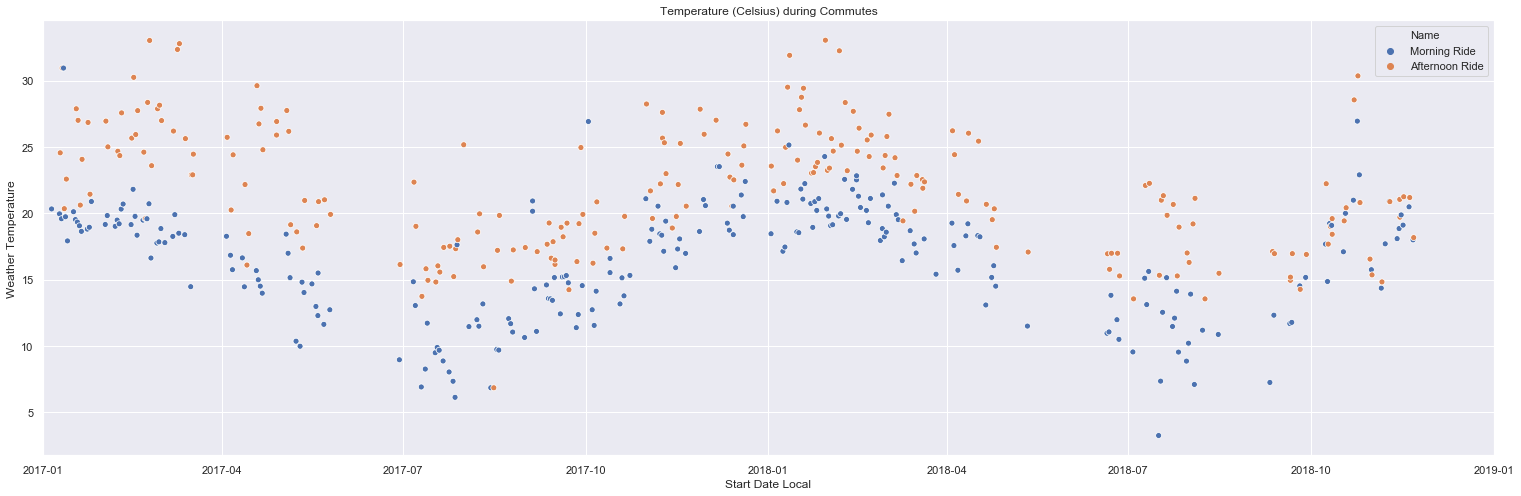

In [208]:
fig, ax = plt.subplots(figsize=(26,8))
sns.scatterplot(x='Start Date Local', y='Weather Temperature', hue='Name', data=rides, ax=ax)
plt.xlim('2017', '2019')
plt.title('Temperature (Celsius) during Commutes')
plt.show()

#### Distance

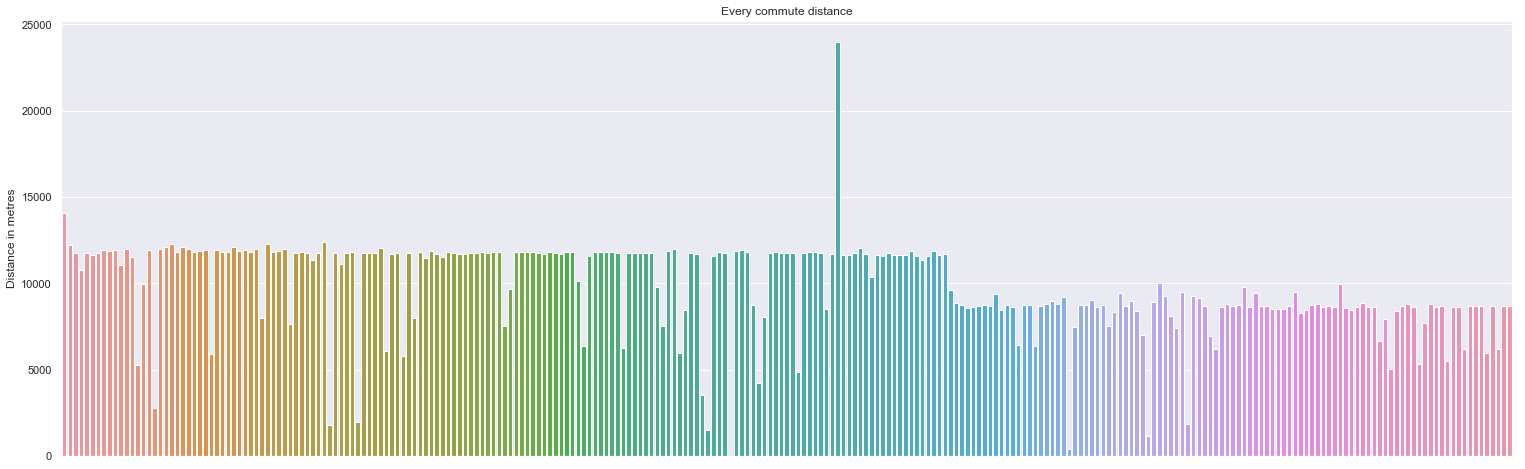

In [209]:
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x='date', y='Distance', data=rides, ci=None, ax=ax)
ax.set_ylabel('Distance in metres')    
ax.set_xlabel('')
ax.set(xticklabels=[])
plt.title("Every commute distance")
plt.show()

In [210]:
rides[rides.Distance==rides.Distance.max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
251,Morning Ride,24000.0,3300,3300,0.0,Ride,2017-12-07 07:30:00+00:00,0,0,True,True,7.273,0.0,0,NaN,NaN,NaN,24.0,23.51,0.52,13.19,0.52,partly-cloudy-day,0.0,NaN,Mostly Cloudy,23.51,2.0,10.003,ESE,4.46,3.77,2017-12-07,07:30:00,24.0,December,7,12,55,Thursday


The longest ride was 24 kilometers and 55 minutes. It was not clearly not a normal workday commute. I was "unofficially" off that day and took a long commute, riding to work and back home, enjoying the peaceful roads during that time of year.

---

There are 249 working days in a year, the remaining days comprise of 104 weekend days and 12 public holidays. 
In South Africa, one typically has 15 days leave per annum

In [211]:
rides.date.nunique()

257

In [212]:
# filtering only 2017
rides2017 = rides[rides['Start Date Local'] < '2018-01-01 00:00']

In [213]:
def plot_daily_heatgram(df, title):
    daily_rides_dist = df.groupby( ['month_num', 'day_num'])['Distance'].sum().to_frame().reset_index()
    daily_rides_dist_pivot = daily_rides_dist.pivot('month_num', 'day_num', 'Distance')
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(daily_rides_dist_pivot, ax=ax, cmap="YlGnBu", vmax=32000)
    plt.title(title)

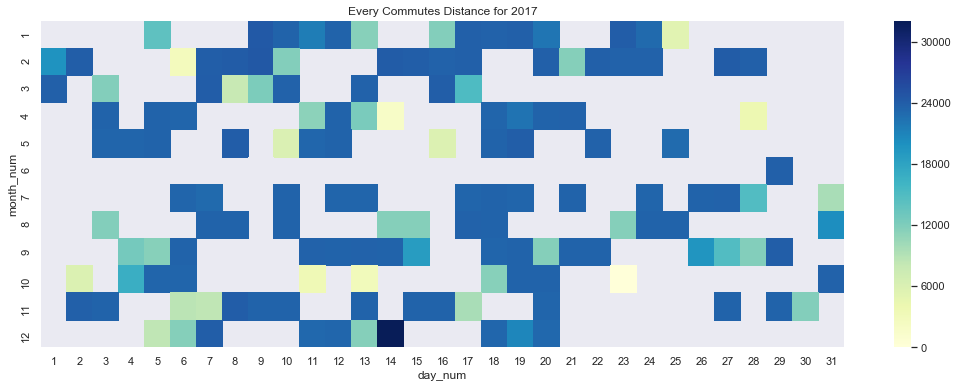

In [214]:
plot_daily_heatgram(rides2017, 'Every Commutes Distance for 2017')

The longest period of non commuting is 26th May till the 28th June - Winter is the wettest months of the year, therefore the least cycling happens then.<br>
I fast for 29/30 days during the month of Ramadaan in which no cycling happens.<br>
In 2017 in began on the 26 May

__What happened on December 14th?__<br>
The 13th has an afernooon ride recorded and the 14th has 2 morning rides, one which was entered manually.<br>
index 257 most probably is an entry for the day before, but the `Start Date Local` variable uses the date it was entered. 

In [215]:
rides2017[(rides2017['Start Date Local'] > '2017-12-13 00:00') & (rides2017['Start Date Local'] < '2017-12-15 00:00')]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
256,Afternoon Ride,11725.7,1979,1997,118.6,Ride,2017-12-13 15:43:51+00:00,0,0,False,False,5.925,13.5,0,263.0,117.4,177.0,11.7,20.53,0.75,13.22,0.63,partly-cloudy-day,0.0,NaN,Mostly Cloudy,20.53,4.0,10.003,WSW,2.05,2.05,2017-12-13,15:43:51,21.0,December,13,12,33,Wednesday
257,Morning Ride,11850.0,2100,2100,0.0,Ride,2017-12-14 08:00:00+00:00,0,0,True,True,5.643,0.0,0,NaN,NaN,NaN,11.9,20.53,0.75,13.22,0.63,partly-cloudy-day,0.0,NaN,Mostly Cloudy,20.53,4.0,10.003,WSW,2.05,2.05,2017-12-14,08:00:00,21.0,December,14,12,35,Thursday
258,Morning Ride,11540.9,1868,1924,96.6,Ride,2017-12-14 08:18:25+00:00,0,0,False,False,6.178,13.9,0,236.1,147.5,178.0,11.5,18.38,0.19,12.84,0.70,partly-cloudy-day,0.0,NaN,Partly Cloudy,18.38,3.0,10.003,SSE,1.83,1.83,2017-12-14,08:18:25,18.0,December,14,12,31,Thursday
259,Afternoon Ride,12806.5,2598,3082,143.8,Ride,2017-12-14 14:22:59+00:00,2,0,False,False,4.929,15.1,1,274.6,151.2,186.0,12.8,22.51,0.25,9.29,0.43,partly-cloudy-day,0.0,NaN,Partly Cloudy,22.51,9.0,10.003,S,3.96,3.96,2017-12-14,14:22:59,23.0,December,14,12,43,Thursday


In [216]:
# filtering only 2018
rides2018 = rides[rides['Start Date Local'] > '2018-01-01 00:00']

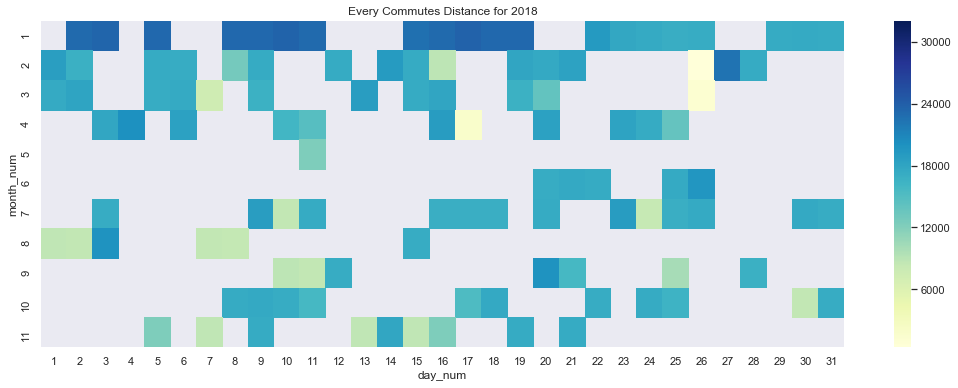

In [217]:
plot_daily_heatgram(rides2018, 'Every Commutes Distance for 2018')

Ramadaan, being based on the lunar calendar moves forward two weeks every year, therefore mid May till mid June I was fasting.<br>
I completed my internship on the 21st of November and began focusing on moving house. So there are no recorded rides in December.<br>
There are alot of gaps as I focused more on my studies. I often came with the car there was less traffic, available parking and easier (and safer) to brought my laptop.<br>


---

In [218]:
rides_count = rides.groupby('date').agg({'Distance':['count','sum']})

In [220]:
rides_count.columns

MultiIndex(levels=[['Distance'], ['count', 'sum']],
           codes=[[0, 0], [0, 1]])

In [221]:
rides_count.columns.values

array([('Distance', 'count'), ('Distance', 'sum')], dtype=object)

In [222]:
rides_count.columns = [' '.join(col).strip() for col in rides_count.columns.values]

In [223]:
rides_count.head()

,Distance count,Distance sum
date,,
2017-01-05,1,14068.4
2017-01-09,2,24404.1
2017-01-10,2,23556.1
2017-01-11,2,21530.8
2017-01-12,2,23533.6


In [226]:
rides_count[(rides_count['Distance count']<2)]

,Distance count,Distance sum
date,,
2017-01-05,1,14068.4
2017-01-13,1,11607.9
2017-01-16,1,11776.6
2017-01-25,1,5265.9
2017-02-06,1,2782.5
2017-02-10,1,11792.2
2017-03-03,1,11789.3
2017-03-08,1,7978.0
2017-03-09,1,12252.0


In [288]:
len(rides_count[(rides_count['Distance count']<2)])

49

There are 49 days where I travelled or attempted to travel one way

In [224]:
incomplete_rides = rides_count[(rides_count['Distance count']<2) & (rides_count['Distance sum'] < 5000)].reset_index()

In [225]:
incomplete_rides

,date,Distance count,Distance sum
0,2017-02-06,1,2782.5
1,2017-04-14,1,1793.3
2,2017-10-11,1,3539.3
3,2017-10-23,1,17.0
4,2018-02-26,1,388.1
5,2018-03-26,1,1174.7
6,2018-04-17,1,1862.5


The are 7 days where I could not complete my ride, due to incliment weather or a puncture ;(

In [227]:
rides2017.groupby('DoW',sort=False)['Distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Thursday,66,792332.6,12005.039394,8483.0,24000.0
Monday,47,513155.7,10918.206383,17.0,12747.4
Tuesday,41,440695.4,10748.668293,0.0,12235.5
Wednesday,54,579170.2,10725.374074,3270.4,12418.4
Friday,54,525990.8,9740.570370,4.4,12121.7


In [228]:
rides2018.groupby('DoW',sort=False)['Distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Tuesday,48,415823.9,8662.997917,1450.7,11715.5
Wednesday,52,448259.0,8620.365385,1056.4,12104.5
Friday,37,326097.0,8813.432432,3666.9,11745.6
Monday,43,371278.8,8634.390698,388.1,11705.2
Thursday,33,269932.8,8179.781818,2551.4,11672.7


In [229]:
rides2017[rides2017.Distance > 5000].groupby('DoW',sort=False)['Distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Thursday,66,792332.6,12005.039394,8483.0,24000.0
Monday,44,509256.1,11574.002273,5941.4,12747.4
Tuesday,38,432254.2,11375.110526,5789.3,12235.5
Wednesday,51,568591.9,11148.860784,5244.0,12418.4
Friday,44,501297.0,11393.113636,6020.6,12121.7


In [230]:
rides2018[rides2018.Distance > 5000].groupby('DoW',sort=False)['Distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Tuesday,45,407837.9,9063.064444,5383.3,11715.5
Wednesday,50,445561.1,8911.222000,5204.1,12104.5
Friday,35,318754.3,9107.265714,7451.4,11745.6
Monday,40,365957.8,9148.945000,8169.5,11705.2
Thursday,27,246187.3,9118.048148,7406.0,11672.7


### heartrate

---

# 2017

In [231]:
rides2017.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
0,Morning Ride,14068.4,2641,2781,73.4,Ride,2017-01-05 07:40:50+00:00,0,0,True,False,5.327,10.8,0,250.2,NaN,NaN,14.1,20.46,0.37,16.50,0.79,partly-cloudy-day,0.0,NaN,Partly Cloudy,20.32,1.0,10.003,S,3.84,2.71,2017-01-05,07:40:50,20.0,January,5,1,44,Thursday
1,Morning Ride,11656.7,1649,1687,62.0,Ride,2017-01-09 07:05:37+00:00,2,0,True,False,7.069,11.6,2,242.2,NaN,NaN,11.7,19.99,0.19,15.64,0.76,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.95,0.0,10.003,S,8.51,4.29,2017-01-09,07:05:37,20.0,January,9,1,27,Monday
2,Afternoon Ride,12747.4,3144,3981,78.5,Ride,2017-01-09 15:55:28+00:00,0,1,True,False,4.055,13.5,0,219.4,NaN,NaN,12.7,24.60,0.19,15.95,0.59,partly-cloudy-day,0.0,NaN,Partly Cloudy,24.55,6.0,10.003,SSE,12.21,7.74,2017-01-09,15:55:28,25.0,January,9,1,52,Monday
3,Morning Ride,11638.4,1739,1805,60.5,Ride,2017-01-10 07:08:35+00:00,0,0,True,False,6.693,10.7,0,229.3,NaN,NaN,11.6,19.58,0.00,13.15,0.66,clear-day,0.0,NaN,Clear,19.58,1.0,3.909,SSE,4.77,1.55,2017-01-10,07:08:35,20.0,January,10,1,29,Tuesday
4,Afternoon Ride,11917.7,2423,2682,73.2,Ride,2017-01-10 15:50:34+00:00,0,0,True,False,4.919,9.6,0,229.0,NaN,NaN,11.9,31.04,NaN,16.30,0.41,clear-day,0.0,NaN,Clear,30.94,NaN,10.003,S,7.24,3.55,2017-01-10,15:50:34,31.0,January,10,1,40,Tuesday


### Distance

In [232]:
rides2017.Distance.sum()

2851344.7

Total distance cycled was 2853,82km

In [233]:
round(rides2017.Distance.mean()/1000,2)

10.88

In [234]:
rides2017.Distance.mode()

0    11600.6
1    11695.0
2    11717.0
3    11790.5
4    11833.3
dtype: float64

In [235]:
rides2017.Distance.max()

24000.0

In [236]:
rides2017.Distance.min()

0.0

In [237]:
rides2017[rides2017.Distance == rides2017.Distance.min()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
48,Afternoon Ride,0.0,2518,2518,0.0,Ride,2017-02-21 15:40:37+00:00,0,0,True,True,0.0,0.0,0,NaN,NaN,NaN,0.0,19.61,0.13,13.05,0.66,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.61,0.0,10.003,SSE,4.38,2.32,2017-02-21,15:40:37,20.0,February,21,2,42,Tuesday


### Temperature

In [238]:
rides2017['Weather Temperature'].max()

33.02

In [239]:
rides2017['Weather Temperature'].min()

6.12

In [240]:
rides2017['Weather Temperature'].mean()

18.87961832061069

In [241]:
rides2017['Weather Temperature'].mode()

0    20.53
dtype: float64

In [242]:
rides2017.weather_temperature_round.mode()

0    19.0
dtype: float64

In [243]:
rides2017.weather_temperature_round.value_counts().head(10)

19.0    28
20.0    24
18.0    23
15.0    19
17.0    18
21.0    18
16.0    14
14.0    12
28.0    11
25.0    10
Name: weather_temperature_round, dtype: int64

In [244]:
rides2017['Weather Summary'].value_counts()

Clear               103
Partly Cloudy        87
Mostly Cloudy        61
Overcast              9
Possible Drizzle      2
Name: Weather Summary, dtype: int64

### Commutes

In [245]:
len(rides2017)

262

In [246]:
rides2017.date.nunique()

145

In [247]:
rides2017['Moving Time'].mean()/60

31.585496183206107

In [248]:
rides2017['Moving Time'].max()/60

57.083333333333336

In [249]:
rides2017['Average Speed'].mean()

5.782435114503818

In [250]:
rides2017[rides2017['Average Speed']==rides2017['Average Speed'].max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
251,Morning Ride,24000.0,3300,3300,0.0,Ride,2017-12-07 07:30:00+00:00,0,0,True,True,7.273,0.0,0,NaN,NaN,NaN,24.0,23.51,0.52,13.19,0.52,partly-cloudy-day,0.0,NaN,Mostly Cloudy,23.51,2.0,10.003,ESE,4.46,3.77,2017-12-07,07:30:00,24.0,December,7,12,55,Thursday


In [251]:
def plot_daily_heatgram(df, title):
    daily_rides_dist = df.groupby( ['month_num', 'day_num'])['Distance'].sum().to_frame().reset_index()
    daily_rides_dist_pivot = daily_rides_dist.pivot('month_num', 'day_num', 'Distance')
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(daily_rides_dist_pivot, ax=ax, cmap="YlGnBu", vmax=32000)
    plt.title(title)

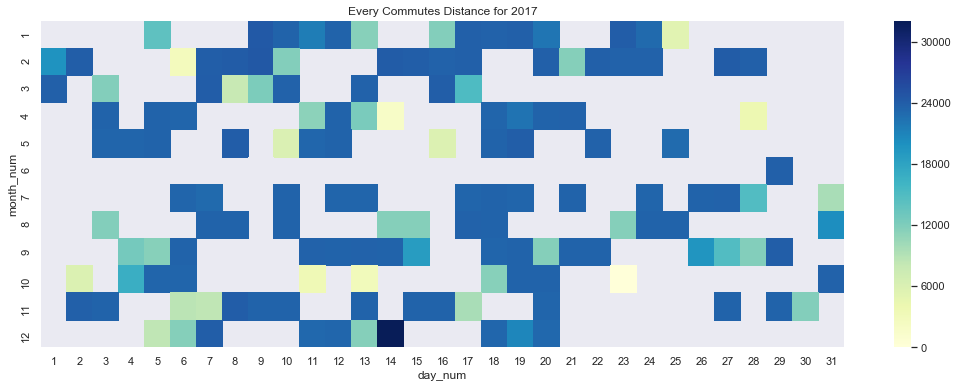

In [252]:
plot_daily_heatgram(rides2017, 'Every Commutes Distance for 2017')

In [253]:
rides2017.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         24  11520.441667  276490.6               NaN      5.621750   
February        34  11216.523529  381361.8               NaN      5.507529   
March           15  11097.100000  166456.5               NaN      5.605733   
April           21  10310.352381  216517.4        146.235714      5.906381   
May             23  10758.530435  247446.2        144.371429      6.015174   
June             2  11888.100000   23776.2        127.050000      5.798000   
July            27  11348.674074  306414.2        131.840741      6.030481   
August          20  11614.660000  232293.2        135.394737      6.008600   
September       32  10542.650000  337364.8        135.403125      5.963156   
October         18   8818.005556  158724.1        115.600000      5.153778   
November        29  10291.093103  298441.7        122.427586      5.806448   
December        17  12121.058824  206058.0        129.920000      5.869647   

          Maximum Speed riding_time_minutes  Humidity Wind Gust Wind Speed  
                   mean                mean      mean      mean       mean  
month                                                                       
January       10.479167           35.541667  0.630417  4.819167   2.707500  
February      10.588235           35.117647  0.623529  3.733529   2.402353  
March          9.880000           33.533333  0.612000  3.596667   2.105333  
April         10.290476           28.952381  0.621429  2.465238   1.533810  
May            9.969565           29.956522  0.706087  2.265217   1.445652  
June           9.400000           34.500000  0.735000  2.765000   2.160000  
July           9.681481           31.407407  0.667037  2.970741   1.958519  
August         9.225000           32.450000  0.697500  3.249500   2.138500  
September      9.887500           29.062500  0.670938  3.536875   2.041250  
October        8.877778           26.277778  0.617778  2.060000   1.201111  
November       9.841379           29.827586  0.573103  4.211379   2.764138  
December      12.476471           34.647059  0.514706  4.232353   3.204706

In [254]:
mornin_rides2017 = rides2017[rides2017.Name=='Morning Ride']

In [255]:
afternoon_rides2017 = rides2017[rides2017.Name=='Afternoon Ride']

In [256]:
mornin_rides2017.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         14  11421.164286  159896.3               NaN      5.941214   
February        18  11255.250000  202594.5               NaN      6.239056   
March            7  11239.071429   78673.5               NaN      6.433143   
April            9  11623.600000  104612.4        151.666667      6.472889   
May             13   9943.669231  129267.7        140.141667      6.241462   
June             1  11907.300000   11907.3        105.400000      5.577000   
July            13  11687.692308  151940.0        128.223077      6.126385   
August          11  11732.627273  129058.9        135.300000      6.183455   
September       17  10873.547059  184850.3        131.182353      6.250706   
October         11   8236.645455   90603.1        107.490909      5.190182   
November        15  10734.206667  161013.1        116.346667      6.150800   
December         9  12705.000000  114345.0        118.071429      6.608556   

          Maximum Speed riding_time_minutes  Humidity Wind Gust Wind Speed  
                   mean                mean      mean      mean       mean  
month                                                                       
January        9.900000           33.571429  0.678571  4.131429   2.336429  
February      10.522222           30.166667  0.716111  2.762778   1.979444  
March         10.757143           29.142857  0.765714  2.515714   1.888571  
April         10.544444           29.888889  0.793333  1.795556   1.503333  
May            9.961538           26.461538  0.808462  1.807692   1.610769  
June           8.200000           36.000000  0.750000  2.130000   2.080000  
July           9.223077           31.923077  0.773077  1.893077   1.529231  
August         9.518182           31.727273  0.787273  2.918182   2.083636  
September      9.670588           28.705882  0.725294  2.978824   1.831176  
October        7.972727           22.454545  0.673636  1.662727   1.139091  
November       9.760000           29.466667  0.624667  3.535333   2.745333  
December      11.588889           31.777778  0.550000  3.873333   3.266667

In [257]:
afternoon_rides2017.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         10  11659.430000  116594.3               NaN      5.174500   
February        16  11172.956250  178767.3               NaN      4.684563   
March            8  10972.875000   87783.0               NaN      4.881750   
April           12   9325.416667  111905.0        142.162500      5.481500   
May             10  11817.850000  118178.5        150.011111      5.721000   
June             1  11868.900000   11868.9        148.700000      6.019000   
July            14  11033.871429  154474.2        135.200000      5.941429   
August           9  11470.477778  103234.3        135.525000      5.794889   
September       15  10167.633333  152514.5        140.186667      5.637267   
October          7   9731.571429   68121.0        128.342857      5.096571   
November        14   9816.328571  137428.6        128.942857      5.437500   
December         8  11464.125000   91713.0        140.287500      5.038375   

          Maximum Speed riding_time_minutes  Humidity Wind Gust Wind Speed  
                   mean                mean      mean      mean       mean  
month                                                                       
January       11.290000           38.300000  0.563000  5.782000   3.227000  
February      10.662500           40.687500  0.519375  4.825625   2.878125  
March          9.112500           37.375000  0.477500  4.542500   2.295000  
April         10.100000           28.250000  0.492500  2.967500   1.556667  
May            9.980000           34.500000  0.573000  2.860000   1.231000  
June          10.600000           33.000000  0.720000  3.400000   2.240000  
July          10.107143           30.928571  0.568571  3.971429   2.357143  
August         8.866667           33.333333  0.587778  3.654444   2.205556  
September     10.133333           29.466667  0.609333  4.169333   2.279333  
October       10.300000           32.285714  0.530000  2.684286   1.298571  
November       9.928571           30.214286  0.517857  4.935714   2.784286  
December      13.475000           37.875000  0.475000  4.636250   3.135000

__notes:__
- most ridden month February with 33 commutes in 18 days
- December had longest average distance
- - the best time of year with less cars = more alternative routes
- There was not one month where morning == afternoon ride
- Feb and March has the longest ride time in the afternoon, summer heat!
- The cooler months in Autumn have the fastest morning commutes

In [258]:
rides2017[rides2017.riding_time_minutes == rides2017.riding_time_minutes.max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
24,Morning Ride,5265.9,3425,3587,30.1,Ride,2017-01-25 08:27:17+00:00,0,0,True,False,1.537,10.4,0,104.9,NaN,NaN,5.3,20.88,0.54,14.75,0.68,partly-cloudy-day,0.0,NaN,Mostly Cloudy,20.88,2.0,10.003,SE,5.81,3.39,2017-01-25,08:27:17,21.0,January,25,1,57,Wednesday
46,Afternoon Ride,12145.9,3415,4277,72.8,Ride,2017-02-20 17:38:56+00:00,0,1,True,False,3.557,10.4,0,251.7,NaN,NaN,12.1,24.60,NaN,15.03,0.55,clear-day,0.0,NaN,Clear,24.60,NaN,NaN,SSE,8.44,4.78,2017-02-20,17:38:56,25.0,February,20,2,57,Monday


In [259]:
rides2017[rides2017['Weather Temperature'] == rides2017['Weather Temperature'].max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
52,Afternoon Ride,11929.0,2171,2766,71.6,Ride,2017-02-23 15:45:55+00:00,2,1,True,False,5.495,11.5,1,239.1,NaN,NaN,11.9,33.02,0.19,13.87,0.31,partly-cloudy-day,0.0,NaN,Partly Cloudy,33.02,5.0,10.003,SSW,2.82,1.45,2017-02-23,15:45:55,33.0,February,23,2,36,Thursday


---

# 2018

In [260]:
rides2018.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
266,Morning Ride,11524.1,1955,1955,104.4,Ride,2018-01-02 07:56:34+00:00,0,0,False,False,5.895,14.2,0,248.6,120.6,179.0,11.5,18.45,0.50,11.65,0.65,partly-cloudy-day,0.0,NaN,Mostly Cloudy,18.45,2.0,10.003,NNW,0.80,0.69,2018-01-02,07:56:34,18.0,January,2,1,33,Tuesday
267,Afternoon Ride,11685.5,2211,2211,144.3,Ride,2018-01-02 11:45:33+00:00,1,1,False,False,5.285,12.1,1,265.6,149.4,195.0,11.7,23.55,NaN,12.36,0.49,clear-day,0.0,NaN,Clear,23.55,NaN,NaN,S,3.82,2.32,2018-01-02,11:45:33,24.0,January,2,1,37,Tuesday
268,Morning Ride,11497.7,1746,1746,97.3,Ride,2018-01-03 08:11:38+00:00,0,1,False,False,6.585,15.3,0,236.8,144.3,178.0,11.5,21.68,NaN,13.36,0.59,clear-day,0.0,NaN,Clear,21.68,NaN,10.003,SSE,3.45,3.45,2018-01-03,08:11:38,22.0,January,3,1,29,Wednesday
269,Afternoon Ride,12000.0,2880,2880,0.0,Ride,2018-01-03 15:30:00+00:00,0,2,True,True,4.167,0.0,0,NaN,NaN,NaN,12.0,21.68,NaN,13.36,0.59,clear-day,0.0,NaN,Clear,21.68,NaN,10.003,SSE,3.45,3.45,2018-01-03,15:30:00,22.0,January,3,1,48,Wednesday
270,Morning Ride,11532.5,1682,1682,104.7,Ride,2018-01-05 08:00:12+00:00,1,1,False,False,6.856,15.6,0,240.1,106.8,137.0,11.5,20.91,0.19,15.55,0.71,partly-cloudy-day,0.0,NaN,Partly Cloudy,20.90,2.0,10.003,S,5.40,3.32,2018-01-05,08:00:12,21.0,January,5,1,28,Friday


### Distance

In [261]:
rides2018.Distance.sum()/1000

1831.3915

In [262]:
round(rides2018.Distance.mean(),2)/1000

8.59808

In [263]:
rides2018.Distance.mode()

0    8687.4
1    8785.4
2    8810.4
dtype: float64

In [264]:
rides2018.Distance.max()/1000

12.1045

In [265]:
rides2018.Distance.min()/1000

0.3881

In [266]:
rides2018[rides2018.Distance == rides2018.Distance.min()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
332,Morning Ride,388.1,111,111,4.3,Ride,2018-02-26 08:12:15+00:00,0,0,False,False,3.496,6.2,0,11.3,111.7,126.0,0.4,17.94,NaN,11.06,0.64,clear-day,0.0,NaN,Clear,17.94,NaN,10.847,SSE,1.35,1.29,2018-02-26,08:12:15,18.0,February,26,2,2,Monday


### Temperature

In [267]:
rides2018['Weather Temperature'].max()

33.04

In [268]:
rides2018['Weather Temperature'].min()

3.24

In [269]:
rides2018['Weather Temperature'].mean()

19.397183098591537

In [270]:
rides2018.weather_temperature_round.mode()

0    21.0
dtype: float64

In [271]:
rides2018.weather_temperature_round.value_counts().head(10)

21.0    25
19.0    20
20.0    20
18.0    16
15.0    15
17.0    15
22.0    13
23.0    13
24.0     9
26.0     9
Name: weather_temperature_round, dtype: int64

In [272]:
rides2018['Weather Summary'].value_counts()

Clear                      91
Partly Cloudy              64
Mostly Cloudy              47
Overcast                    9
Windy and Partly Cloudy     2
Name: Weather Summary, dtype: int64

### Commutes

In [273]:
rides2018.date.nunique()

112

In [274]:
len(rides2018)

213

In [275]:
rides2018['Moving Time'].mean()/60

26.409937402190923

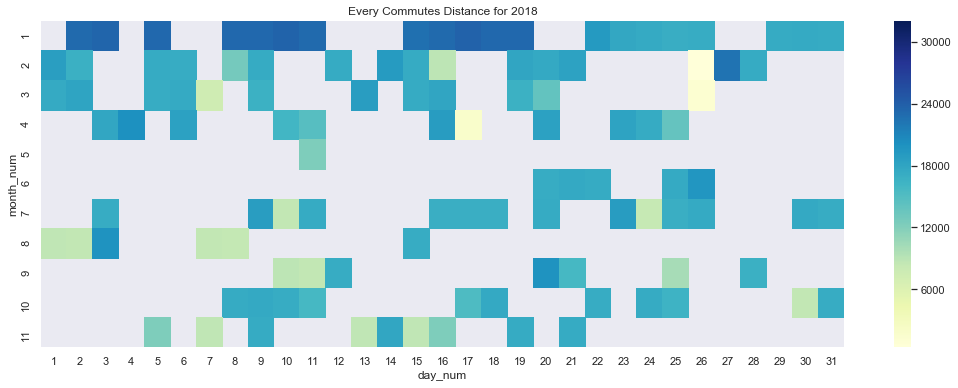

In [276]:
plot_daily_heatgram(rides2018, 'Every Commutes Distance for 2018')

In [277]:
rides2018.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         40  10513.400000  420536.0        131.428205      5.705775   
February        32   8048.171875  257541.5        130.418750      5.642437   
March           22   8211.700000  180657.4        129.845455      5.296000   
April           21   8390.566667  176201.9        128.814286      5.612381   
May              2   6164.700000   12329.4        122.600000      6.100500   
June            10   8930.390000   89303.9        142.970000      5.190100   
July            26   8732.123077  227035.2        145.984615      5.320615   
August           8   8943.775000   71550.2        134.262500      5.227625   
September       13   7501.246154   97516.2        140.500000      4.989308   
October         23   7742.843478  178085.4        142.208696      5.084739   
November        16   7539.650000  120634.4        136.550000      5.484563   

          Maximum Speed riding_time_minutes  Humidity  Wind Gust Wind Speed  
                   mean                mean      mean       mean       mean  
month                                                                        
January       13.520000           31.150000  0.599250   4.169500   3.160500  
February      12.890625           23.625000  0.633125   3.873125   3.059687  
March         12.722727           25.863636  0.640000   3.975909   2.989091  
April         12.761905           25.047619  0.681905   3.715714   2.469048  
May           12.300000           17.000000  0.755000   2.555000   1.555000  
June          12.080000           28.800000  0.801000        NaN   4.464000  
July          12.215385           27.538462  0.695385  12.900000   4.103462  
August        12.075000           28.625000  0.673750        NaN   4.275000  
September     12.130769           24.461538  0.691538        NaN   5.295833  
October       11.821739           25.434783  0.610435   5.974348   5.558261  
November      12.656250           22.437500  0.643750   6.793750   6.301250

In [278]:
mornin_rides2018 = rides2018[rides2018.Name=='Morning Ride']

In [279]:
afternoon_rides2018 = rides2018[rides2018.Name=='Afternoon Ride']

In [280]:
mornin_rides2018.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         20  10453.700000  209074.0        123.535000      6.270650   
February        18   7631.983333  137375.7        117.577778      5.818278   
March           11   7953.990909   87493.9        122.836364      5.607091   
April           11   7756.663636   85323.3        122.618182      5.717455   
May              1   8653.600000    8653.6         98.700000      6.064000   
June             5   9154.880000   45774.4        140.300000      5.087000   
July            14   8658.350000  121216.9        144.307143      5.353500   
August           4   9368.350000   37473.4        124.425000      5.483750   
September        6   8450.683333   50704.1        148.633333      5.246000   
October         10   8718.280000   87182.8        142.310000      5.488200   
November         9   8146.300000   73316.7        135.577778      5.838111   

          Maximum Speed riding_time_minutes  Humidity Wind Gust Wind Speed  
                   mean                mean      mean      mean       mean  
month                                                                       
January       14.640000           27.750000  0.673000  2.899000   2.223500  
February      13.355556           21.277778  0.713333  2.444444   2.048889  
March         13.209091           23.181818  0.726364  3.425455   2.446364  
April         12.672727           22.545455  0.791818  2.664545   1.781818  
May           12.900000           24.000000  0.840000  1.240000   1.150000  
June          11.540000           30.000000  0.882000       NaN   4.118000  
July          12.250000           27.071429  0.812143       NaN   3.245000  
August        13.275000           28.750000  0.822500       NaN   3.150000  
September     12.133333           26.833333  0.776667       NaN   4.142000  
October       12.700000           26.800000  0.624000  4.110000   3.648000  
November      13.044444           23.333333  0.635556  5.588889   4.713333

In [281]:
afternoon_rides2018.groupby('month', sort=False).agg(
    {'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean',
     'Humidity':'mean', 'Wind Gust': 'mean', 'Wind Speed':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
month                                                                        
January         20  10573.100000  211462.0        139.736842      5.140900   
February        14   8583.271429  120165.8        146.928571      5.416357   
March           11   8469.409091   93163.5        136.854545      4.984909   
April           10   9087.860000   90878.6        135.630000      5.496800   
May              1   3675.800000    3675.8        146.500000      6.137000   
June             5   8705.900000   43529.5        145.640000      5.293200   
July            12   8818.191667  105818.3        147.941667      5.282250   
August           4   8519.200000   34076.8        144.100000      4.971500   
September        7   6687.442857   46812.1        133.528571      4.769286   
October         13   6992.507692   90902.6        142.130769      4.774385   
November         7   6759.671429   47317.7        137.800000      5.030000   

          Maximum Speed riding_time_minutes  Humidity  Wind Gust Wind Speed  
                   mean                mean      mean       mean       mean  
month                                                                        
January       12.400000           34.550000  0.525500   5.440000   4.097500  
February      12.292857           26.642857  0.530000   5.710000   4.359286  
March         12.236364           28.545455  0.553636   4.526364   3.531818  
April         12.860000           27.800000  0.561000   4.872000   3.225000  
May           11.700000           10.000000  0.670000   3.870000   1.960000  
June          12.620000           27.600000  0.720000        NaN   4.810000  
July          12.175000           28.083333  0.559167  12.900000   5.105000  
August        10.875000           28.500000  0.525000        NaN   5.400000  
September     12.128571           22.428571  0.618571        NaN   6.120000  
October       11.146154           24.384615  0.600000   7.408462   7.027692  
November      12.157143           21.285714  0.654286   8.342857   8.342857

__notes:__
- 

In [282]:
rides2018[rides2018.riding_time_minutes == rides2018.riding_time_minutes.max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
269,Afternoon Ride,12000.0,2880,2880,0.0,Ride,2018-01-03 15:30:00+00:00,0,2,True,True,4.167,0.0,0,NaN,NaN,NaN,12.0,21.68,NaN,13.36,0.59,clear-day,0.0,NaN,Clear,21.68,NaN,10.003,SSE,3.45,3.45,2018-01-03,15:30:00,22.0,January,3,1,48,Wednesday


In [283]:
rides2018[rides2018['Weather Temperature'] == rides2018['Weather Temperature'].max()]

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
301,Afternoon Ride,8615.0,1521,1521,76.0,Ride,2018-01-29 16:26:17+00:00,0,0,False,False,5.664,15.0,0,179.1,148.3,167.0,8.6,33.04,NaN,14.36,0.32,clear-day,0.0,NaN,Clear,33.04,NaN,10.003,SSW,3.05,3.05,2018-01-29,16:26:17,33.0,January,29,1,25,Monday


### Weekdays

In [284]:
rides2017.head()

,Name,Distance,Moving Time,Elapsed Time,Total Elevation Gain,Type,Start Date Local,Achievement Count,Kudos Count,Commute,Manual,Average Speed,Maximum Speed,PR Count,Kilojoules,Average Heartrate,Maximum Heartrate,Distance (km),Apparent Temperature,Cloud Cover,Dew Point,Humidity,Weather Icon Class,Precipation Probability,Precipation Type,Weather Summary,Weather Temperature,UV Index,Weather Visibility,weather_wind_direction,Wind Gust,Wind Speed,date,time,weather_temperature_round,month,day_num,month_num,riding_time_minutes,DoW
0,Morning Ride,14068.4,2641,2781,73.4,Ride,2017-01-05 07:40:50+00:00,0,0,True,False,5.327,10.8,0,250.2,NaN,NaN,14.1,20.46,0.37,16.50,0.79,partly-cloudy-day,0.0,NaN,Partly Cloudy,20.32,1.0,10.003,S,3.84,2.71,2017-01-05,07:40:50,20.0,January,5,1,44,Thursday
1,Morning Ride,11656.7,1649,1687,62.0,Ride,2017-01-09 07:05:37+00:00,2,0,True,False,7.069,11.6,2,242.2,NaN,NaN,11.7,19.99,0.19,15.64,0.76,partly-cloudy-day,0.0,NaN,Partly Cloudy,19.95,0.0,10.003,S,8.51,4.29,2017-01-09,07:05:37,20.0,January,9,1,27,Monday
2,Afternoon Ride,12747.4,3144,3981,78.5,Ride,2017-01-09 15:55:28+00:00,0,1,True,False,4.055,13.5,0,219.4,NaN,NaN,12.7,24.60,0.19,15.95,0.59,partly-cloudy-day,0.0,NaN,Partly Cloudy,24.55,6.0,10.003,SSE,12.21,7.74,2017-01-09,15:55:28,25.0,January,9,1,52,Monday
3,Morning Ride,11638.4,1739,1805,60.5,Ride,2017-01-10 07:08:35+00:00,0,0,True,False,6.693,10.7,0,229.3,NaN,NaN,11.6,19.58,0.00,13.15,0.66,clear-day,0.0,NaN,Clear,19.58,1.0,3.909,SSE,4.77,1.55,2017-01-10,07:08:35,20.0,January,10,1,29,Tuesday
4,Afternoon Ride,11917.7,2423,2682,73.2,Ride,2017-01-10 15:50:34+00:00,0,0,True,False,4.919,9.6,0,229.0,NaN,NaN,11.9,31.04,NaN,16.30,0.41,clear-day,0.0,NaN,Clear,30.94,NaN,10.003,S,7.24,3.55,2017-01-10,15:50:34,31.0,January,10,1,40,Tuesday


In [285]:
rides2018.groupby('day_num').agg({'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean'})

Distance                         Average Heartrate Average Speed  \
           count          mean       sum              mean          mean   
day_num                                                                    
1              5   8971.460000   44857.3        130.440000      5.463200   
2              7   9539.157143   66774.1        134.571429      5.529000   
3              8   9815.125000   78521.0        142.528571      5.298250   
4              2  10017.600000   20035.2        138.100000      5.361500   
5              8   8791.700000   70333.6        126.637500      5.639875   
6              6   8874.033333   53244.2        137.083333      5.402667   
7              3   8254.133333   24762.4        140.133333      5.720667   
8              7   8842.214286   61895.5        131.985714      5.669286   
9             12   9265.941667  111191.3        137.775000      5.506250   
10             8   9327.850000   74622.8        145.875000      5.679000   
11            12   7676.725000   92120.7        136.191667      5.625750   
12             4   8673.325000   34693.3        137.650000      5.602250   
13             3   9175.966667   27527.9        123.300000      5.696333   
14             6   6162.933333   36977.6        129.366667      4.923000   
15             9   9268.911111   83420.2        131.677778      5.567778   
16            11   8921.236364   98133.6        142.554545      5.734545   
17             7   8283.757143   57986.3        143.500000      5.281714   
18             6   9663.716667   57982.3        142.016667      5.335667   
19             8   9431.837500   75454.7        137.125000      5.725375   
20            13   8061.315385  104797.1        133.784615      5.203769   
21             8   8646.925000   69175.4        136.450000      5.377750   
22             6   8982.566667   53895.4        144.300000      5.506333   
23             6   9174.983333   55049.9        128.266667      5.544833   
24             7   8635.714286   60450.0        132.785714      5.553286   
25            13   7078.046154   92014.6        128.723077      4.959769   
26             8   6976.825000   55814.6        126.787500      4.875000   
27             3   7491.266667   22473.8        122.966667      5.782667   
28             4   8560.500000   34242.0        145.925000      5.418750   
29             2   8706.950000   17413.9        147.450000      5.818500   
30             5   8736.660000   43683.3        135.200000      4.906000   
31             6   8641.250000   51847.5        129.083333      5.487333   

        Maximum Speed riding_time_minutes  
                 mean                mean  
day_num                                    
1           13.040000           27.600000  
2           12.485714           29.142857  
3           11.325000           31.500000  
4           11.850000           31.500000  
5           13.350000           26.375000  
6           12.683333           27.666667  
7           13.633333           24.333333  
8           12.814286           26.142857  
9           12.766667           28.166667  
10          12.575000           27.500000  
11          12.475000           22.416667  
12          13.750000           25.750000  
13          12.700000           27.000000  
14          11.700000           18.833333  
15          12.944444           28.000000  
16          13.127273           26.090909  
17          12.457143           26.000000  
18          12.933333           30.333333  
19          13.425000           28.000000  
20          12.630769           25.846154  
21          12.825000           26.875000  
22          13.100000           27.166667  
23          14.133333           27.666667  
24          12.585714           26.000000  
25          11.700000           23.769231  
26          11.712500           22.500000  
27          12.533333           22.000000  
28          13.000000           26.500000  
29          14.050000           25.000000  
30          11.

In [286]:
rides2017.groupby('DoW').agg({'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean'})

Distance                         Average Heartrate Average Speed  \
             count          mean       sum              mean          mean   
DoW                                                                          
Friday          54   9740.570370  525990.8        130.560976      5.753685   
Monday          47  10918.206383  513155.7        130.053125      5.715298   
Thursday        66  12005.039394  792332.6        134.247917      5.875652   
Tuesday         41  10748.668293  440695.4        134.426087      5.773659   
Wednesday       54  10725.374074  579170.2        131.148485      5.762352   

          Maximum Speed riding_time_minutes  
                   mean                mean  
DoW                                          
Friday         9.507407           27.444444  
Monday        10.400000           32.042553  
Thursday       9.986364           34.454545  
Tuesday       10.292683           31.609756  
Wednesday     10.374074           31.703704

In [287]:
rides2018.groupby('DoW').agg({'Distance':['count', 'mean', 'sum'], 'Average Heartrate':'mean', 'Average Speed':'mean', 'Maximum Speed':'mean', 'riding_time_minutes':'mean'})

Distance                        Average Heartrate Average Speed  \
             count         mean       sum              mean          mean   
DoW                                                                         
Friday          37  8813.432432  326097.0        135.672973      5.608459   
Monday          43  8634.390698  371278.8        134.744186      5.467953   
Thursday        33  8179.781818  269932.8        133.851515      5.231576   
Tuesday         48  8662.997917  415823.9        135.787500      5.381083   
Wednesday       52  8620.365385  448259.0        136.052941      5.450269   

          Maximum Speed riding_time_minutes  
                   mean                mean  
DoW                                          
Friday        13.191892           26.486486  
Monday        12.732558           26.186047  
Thursday      12.439394           26.121212  
Tuesday       12.489583           26.833333  
Wednesday     12.448077           26.346154

the above should be shown for all rides for both 2017 and 2018.

commutes2017 = rides2017[rides2017.DoW == weekend] for all stats
check for outliers
check for other anomilies
then derive insights

check morning not afternoon DoW
explain possible reasons why Wednessday most rides
   and Thursday/Friday least - punctures